# BlindCliffWalker comparison of different replay memory sampling strategies

In [4]:
import numpy as np
import pandas as pd
from liftoff.liftoff_results import collect_results

import altair as alt
alt.renderers.enable('notebook')
np.set_printoptions(linewidth=120, precision=3, suppress=True)

In [6]:
def get_data(experiment_name):
    result_paths = collect_results(experiment_name=experiment_name,
                                   results_dir='../results', 
                                   names=['results.msgpack'])
    result_paths = [p for p in result_paths if p[1]]
    result_data_frames = [pd.read_msgpack(f'{p[0]}/{p[1][0]}') for p in result_paths]

    return pd.concat(result_data_frames, ignore_index=True)

In [49]:
def get_plot(data=None, title='Undefined', y_scale='log'):
    x_title = 'size of the experience replay as filled by a random policy'
    x_axis = alt.X('mem_size', scale=alt.Scale(type='log'), axis=alt.Axis(title=x_title))
    
    line = alt.Chart(data).mark_line(point=True).encode(
        x=x_axis,
        y='mean(optim_steps)',
        color=alt.Color('sampling_type', legend=alt.Legend(title="Sampling method")),
        tooltip=['mem_size', 'mean(optim_steps)', 'sampling_type'])

    confidence_interval = alt.Chart(data).mark_area(opacity=0.3).encode(
        x=x_axis,
        y=alt.Y('ci0(optim_steps)', axis=alt.Axis(title='optimisation steps'), scale=alt.Scale(type=y_scale)),
        y2='ci1(optim_steps)',
        color=alt.Color('sampling_type'))
    return (confidence_interval + line).properties(width=700, title=title)

In [50]:
def get_title(name):
    return ' '.join(name.split('_'))

In [51]:
experiments = ('rank_alpha_sweep', 'uniform_vs_greedy_vs_rank')
results = {name: {'data': get_data(name), 'title': get_title(name)} for name in experiment_names}

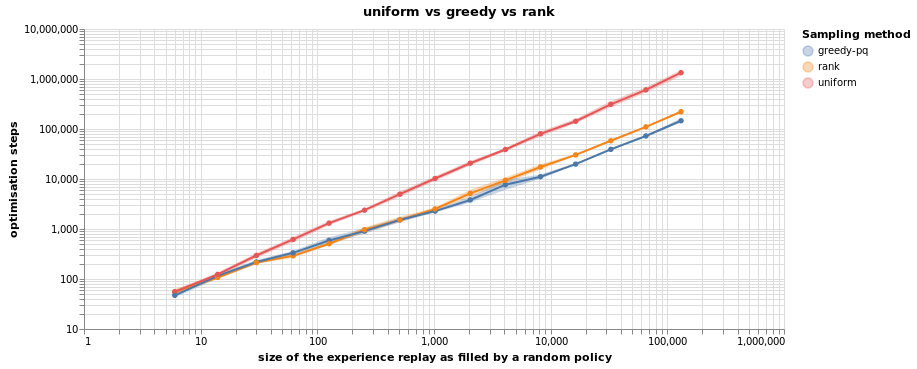

In [52]:
get_plot(**results['uniform_vs_greedy_vs_rank'])

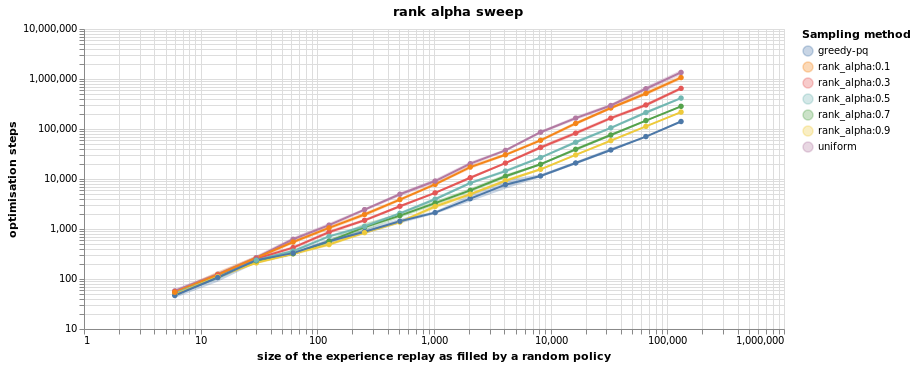

In [53]:
get_plot(**results['rank_alpha_sweep'])

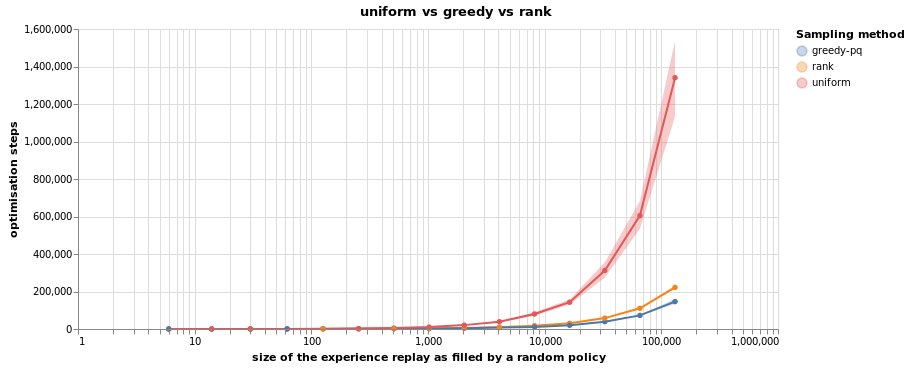

In [55]:
get_plot(**results['uniform_vs_greedy_vs_rank'], y_scale='linear')